In [1]:
from Kmeans import *
from Coreset import *
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score as NMI
from datetime import datetime

In [2]:
data = np.genfromtxt("data/bio_train.csv", delimiter=",")[:,3:]
data = MinMaxScaler().fit_transform(data)
labels_true = np.genfromtxt("data/bio_train.csv", delimiter=",")[:,0]

In [8]:
model = Kmeans(k=153, max_iters=400)
model.fit(data, cluster_initialization=ClusterInitialization.random)
labels_computed = model.labels_
print(f"NMI: {NMI(labels_true, labels_computed)}")
errors_random = model.errors
losses_random = model.losses

 61%|██████    | 243/400 [06:30<04:12,  1.61s/it]
Kmeans converged. Exiting loop.

NMI: 0.20379531286455269



In [4]:
model = Kmeans(k=153, max_iters=400)
model.fit(data, cluster_initialization=ClusterInitialization.firstk)
labels_computed = model.labels_
print(f"NMI: {NMI(labels_true, labels_computed)}")
errors_firstk = model.errors
losses_firstk = model.losses

 64%|██████▍   | 256/400 [06:22<03:35,  1.50s/it]
Kmeans converged. Exiting loop.

NMI: 0.2013254279734893



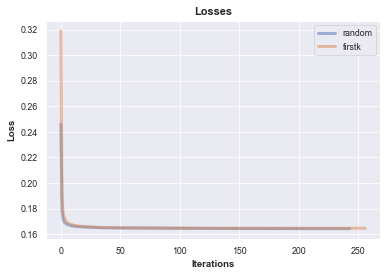

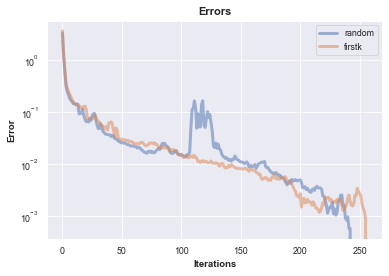

In [9]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')

plt.title("Losses", fontweight="bold", fontsize=11)

plt.plot(losses_random, lw=3, alpha=0.5, label="random")
plt.plot(losses_firstk, lw=3, alpha=0.5, label="firstk")
plt.ylabel("Loss", fontweight="bold")
plt.xlabel("Iterations", fontweight="bold")
plt.legend()
plt.savefig("loss.png", dpi=600)
plt.show()

plt.title("Errors", fontweight="bold", fontsize=11)

plt.yscale("log")
plt.plot(errors_random, lw=3, alpha=0.5, label="random")
plt.plot(errors_firstk, lw=3, alpha=0.5, label="firstk")
plt.ylabel("Error", fontweight="bold")
plt.xlabel("Iterations", fontweight="bold")
plt.legend()
plt.savefig("error.png", dpi=600)
plt.show()


In [6]:
from Coreset import *

coreset = Coreset(data)
coreset.get_q()
cs, ind = coreset.get_coreset(1000)

model = Kmeans(k=153, max_iters=300)
model.fit(cs)
labels_computed = model.labels_
print(f"NMI: {NMI(labels_true[ind], labels_computed)}")



145750it [00:01, 112887.19it/s]
  2%|▏         | 7/300 [00:00<00:04, 71.09it/s]


Kmeans converged. Exiting loop.

NMI: 0.6213003613188396


## Test with different clustering algorithms

In [7]:
from sklearn import cluster 
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn import mixture

In [8]:
start = datetime.now()  # runtime

coreset = Coreset(data)
coreset.get_q()
cs, ind = coreset.get_coreset(1000)

clustering = cluster.KMeans(n_clusters=153).fit(cs)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(clusters_sklearn, labels_true[ind]))
print(nmi(clusters_sklearn, labels_true[ind], average_method='arithmetic'))
print("Number of iterations: ", clustering.n_iter_)

145750it [00:01, 127548.58it/s]


Finished in 0:00:01.953573
0.6250285386575269
0.6250285386575269
Number of iterations:  5


### Agreement between sklearn's and custom kmeans labels

In [9]:
print(NMI(clusters_sklearn, labels_computed)) # not too shabby

0.595500159912156


In [ ]:

# GaussianMixture
start = datetime.now()  # runtime
clustering = mixture.GaussianMixture(n_components=153)
labels = clustering.fit_predict(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))


In [ ]:
start = datetime.now()  # runtime

clustering = cluster.DBSCAN(eps=0.3, min_samples=30).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))


In [ ]:
start = datetime.now()  # runtime

clustering = cluster.AgglomerativeClustering(n_clusters=153).fit(data)
runtime = datetime.now() - start
print(f"Finished in {runtime}")

clusters_sklearn = clustering.labels_
print(NMI(labels, clusters_sklearn))